In [11]:
corpus = [
    "Do you want ants?",
    "Because that's how you get ants."
]
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(corpus)
print(vect.get_feature_names())

X = vect.transform(corpus)
print(X.toarray())

['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']
[[1 0 1 0 0 0 1 1]
 [1 1 0 1 1 1 0 1]]


In [12]:
corpus2 = [
    "Do you want ants? bla",
    "Because that's how you get ants. blabla"
]
X = vect.transform(corpus2)
print(X.toarray()) # we can see that we are getting the same result, even though we added a new words
# the meaning that vect can work only with words that appear during fit

[[1 0 1 0 0 0 1 1]
 [1 1 0 1 1 1 0 1]]


In [50]:
# we can change how we split our words
vect = CountVectorizer()
vect.fit(corpus)
print(vect.get_feature_names())

vect = CountVectorizer(token_pattern=r"\b\w+\b")
vect.fit(corpus)
print(vect.get_feature_names())

vect = CountVectorizer(token_pattern=r"\b\w[\w']+\b")
vect.fit(corpus)
print(vect.get_feature_names())

['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']
['ants', 'because', 'do', 'get', 'how', 's', 'that', 'want', 'you']
['ants', 'because', 'do', 'get', 'how', "that's", 'want', 'you']


In [53]:
vect = CountVectorizer(min_df=2)
vect.fit(corpus)
print(vect.get_feature_names())

vect = CountVectorizer(max_features=4)
vect.fit(corpus)
print(vect.get_feature_names())

['ants', 'you']
['ants', 'because', 'do', 'you']


In [54]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tfidf = TfidfVectorizer(norm='l2').fit_transform(corpus)
print(tfidf.toarray())

[[0.41  0.    0.576 0.    0.    0.    0.576 0.41 ]
 [0.318 0.447 0.    0.447 0.447 0.447 0.    0.318]]


***IMDB***

In [14]:
from sklearn.datasets import load_files
import numpy as np

reviews_train = load_files("/Users/alexanderkruglyak/Downloads/aclImdb/train/")
text_trainval, y_trainval = reviews_train.data, reviews_train.target

In [19]:
print(type(text_trainval))
print(len(text_trainval))
print(np.bincount(y_trainval))

<class 'list'>
75000
[12500 12500 50000]


In [31]:
print(text_trainval[0].decode())
print(y_trainval[0])

Full of (then) unknown actors TSF is a great big cuddly romp of a film.<br /><br />The idea of a bunch of bored teenagers ripping off the local sink factory is odd enough, but add in the black humour that Forsyth & Co are so good at and your in for a real treat.<br /><br />The comatose van driver by itself worth seeing, and the canal side chase is just too real to be anything but funny.<br /><br />And for anyone who lived in Glasgow it's a great "Oh I know where that is" film.
2


In [32]:
from sklearn.model_selection import train_test_split

text_trainval = [doc.replace(b"<br />", b" ") for doc in text_trainval]
text_train, text_val, y_train, y_val = train_test_split(text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer()
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<56250x110241 sparse matrix of type '<class 'numpy.int64'>'
	with 7742882 stored elements in Compressed Sparse Row format>

In [39]:
# check vocabulary
feature_names = vect.get_feature_names()
print(len(feature_names))
print(feature_names[:10])
print(feature_names[1000:1010])
print(feature_names[10000:10010])
print(feature_names[110000:110010])

110241
['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001']
['356', '357', '359', '35c', '35mins', '35mm', '35mmm', '35pm', '35th', '35yr']
['belarus', 'belasco', 'belated', 'belatedly', 'belay', 'belays', 'belch', 'belched', 'belching', 'beldar']
['zohan', 'zohar', 'zoheb', 'zohra', 'zoidberg', 'zoiderberg', 'zoimbies', 'zola', 'zolashoffs', 'zoltan']


In [41]:
# classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_val, y_val)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6706133333333333

In [42]:
lrc = LogisticRegressionCV().fit(X_train, y_train)
lrc.score(X_val, y_val)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.70448

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [44]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

IndexError: index 218581 is out of bounds for axis 0 with size 110241

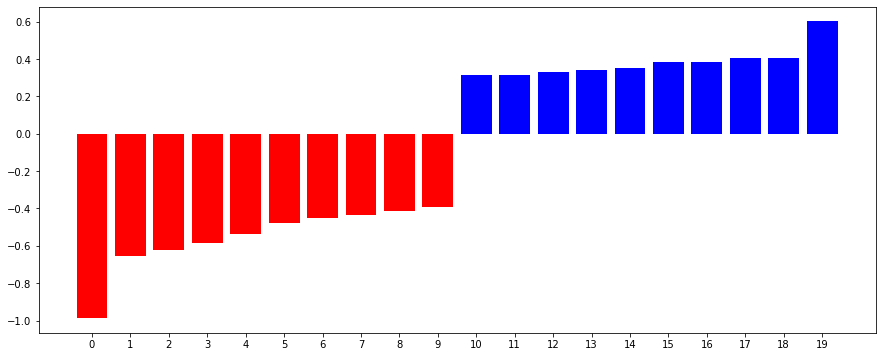

In [47]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=10, rotation=40)
ax = plt.gca()
plt.show()

In [46]:
lr.coef_.ravel()

array([-0.01 , -0.005, -0.   , ...,  0.001,  0.001,  0.002])

In [11]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

/usr/local/opt/python@3.7/bin/python3.7: No module named spacy


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# doc = nlp(u'Charles Spencer Chaplin was born on 16 April 1889 toHannah Chaplin (born Hannah Harriet Pedlingham Hill) and Charles Chaplin Sr')
# for token in doc:
#     print(token.text, token.lemma_, token.pos_,
#           token.shape_, token.is_alpha, token.is_stop)